<a href="https://colab.research.google.com/github/SUNWOUNG/HOMEWORK/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

data = pd.read_csv('sample_data/test.csv')  ### here to select the input data file
print('Dataset shape:', data.shape)
data.describe()


Dataset shape: (101, 147)


,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,max_Number,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Sm
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,2.158416,0.710796,0.645857,0.607936,0.595974,0.588407,42.077558,43.000000,19.116887,65.475248,...,176.089109,194.493399,0.220671,0.047447,0.297285,0.434596,0.089109,0.108537,0.049904,16.268317
std,0.366952,0.062409,0.080324,0.098001,0.106964,0.114048,8.078302,9.704638,4.412545,2.629046,...,42.641083,36.578211,0.077511,0.055472,0.201148,0.148166,0.286322,0.098284,0.049491,8.894025
min,2.000000,0.577350,0.480750,0.415244,0.389977,0.372041,25.000000,16.000000,7.111111,59.000000,...,64.000000,64.000000,0.111111,0.000000,0.000000,0.096774,0.000000,0.023739,0.010551,2.000000
25%,2.000000,0.707107,0.629961,0.574349,0.552045,0.535887,36.500000,37.000000,16.444444,64.000000,...,194.000000,194.000000,0.171429,0.000000,0.129630,0.333333,0.000000,0.070306,0.031247,10.000000
50%,2.000000,0.745356,0.693361,0.670782,0.667408,0.666732,41.000000,40.000000,18.666667,66.000000,...,194.000000,194.000000,0.200000,0.038462,0.344828,0.420000,0.000000,0.106157,0.044550,15.500000
75%,2.000000,0.745356,0.693361,0.670782,0.667408,0.666732,47.500000,52.000000,20.888889,67.000000,...,194.000000,216.666667,0.240000,0.076923,0.451613,0.555556,0.000000,0.112214,0.051242,21.300000
max,3.000000,0.790569,0.759147,0.750616,0.750049,0.750001,61.666667,62.000000,30.500000,69.000000,...,194.000000,225.000000,0.545455,0.222222,0.656250,0.733333,1.000000,0.567090,0.283545,47.460000


In [33]:
from sklearn.utils import shuffle

features = list(data)[1:-1]

properties = list(data)[-1]

data = shuffle(data, random_state=0)
X = data[features]
y = data[properties]


print('number of features:', len(features))

data.head()

number of features: 145


,compound,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Sm
26,TbB2,2,0.745356,0.693361,0.670782,0.667408,0.666732,25.0,60,26.666667,...,166,166.000000,0.352941,0.117647,0.000000,0.529412,0,0.158210,0.070316,10.0
86,TbFeSi,3,0.577350,0.480750,0.415244,0.389977,0.372041,35.0,51,20.000000,...,194,216.666667,0.260870,0.086957,0.260870,0.391304,0,0.112214,0.045570,17.5
2,GdAl2,2,0.745356,0.693361,0.670782,0.667408,0.666732,30.0,51,22.666667,...,194,225.000000,0.375000,0.125000,0.062500,0.437500,0,0.041154,0.018291,6.5
55,TbNi,2,0.707107,0.629961,0.574349,0.552045,0.535887,46.5,37,18.500000,...,194,209.500000,0.190476,0.000000,0.380952,0.428571,0,0.115294,0.057647,21.5
75,Tb3Co,2,0.790569,0.759147,0.750616,0.750049,0.750001,55.5,38,14.250000,...,194,194.000000,0.190476,0.000000,0.166667,0.642857,0,0.106157,0.039809,15.4


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

### Task1: here try to fill ML model code and cross validation code, you can check these code on sklearn web page. 
## model tried/used: RandomForests

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)
#X_train.shape ##results in (75, 145) because we have 145 features, but why 75?


reg = RandomForestRegressor()  
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test) #predicted nr. of last feature
y_pred

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
np.sqrt(mean_squared_error(y_test, y_pred)) #squared mean squared error

scores = cross_val_score(reg, X, y, cv=10)  # fill here


### result
scores.mean()

0.16444477247859995

In [35]:
from sklearn.feature_selection import VarianceThreshold
# Get features that return at least 95% of the Bernoulli random variables
sel =  VarianceThreshold(threshold=(0.95*(1-0.95)))
# You can see which features have been retained
X_sel = sel.fit_transform(X)
# Output results
feature_index = sel.get_support()
print('number of features after remove redundant ones:',sum(feature_index))


final_features=['NComp', 'Comp_L2Norm', 'Comp_L3Norm', 'Comp_L5Norm', 'Comp_L7Norm', 'Comp_L10Norm', 'mean_Number', 'maxdiff_Number', 'dev_Number', 'max_Number', 'min_Number', 'most_Number', 'mean_MendeleevNumber', 'maxdiff_MendeleevNumber', 'dev_MendeleevNumber', 'max_MendeleevNumber', 'min_MendeleevNumber', 'most_MendeleevNumber', 'mean_AtomicWeight', 'maxdiff_AtomicWeight', 'dev_AtomicWeight', 'max_AtomicWeight', 'min_AtomicWeight', 'most_AtomicWeight', 'mean_MeltingT', 'maxdiff_MeltingT', 'dev_MeltingT', 'max_MeltingT', 'min_MeltingT', 'most_MeltingT', 'mean_Column', 'maxdiff_Column', 'dev_Column', 'max_Column', 'min_Column', 'most_Column', 'mean_Row', 'maxdiff_Row', 'dev_Row', 'max_Row', 'min_Row', 'most_Row', 'mean_CovalentRadius', 'maxdiff_CovalentRadius', 'dev_CovalentRadius', 'max_CovalentRadius', 'min_CovalentRadius', 'most_CovalentRadius', 'mean_Electronegativity', 'maxdiff_Electronegativity', 'dev_Electronegativity', 'max_Electronegativity', 'min_Electronegativity', 'most_Electronegativity', 'mean_NsValence', 'maxdiff_NsValence', 'dev_NsValence', 'max_NsValence', 'min_NsValence', 'most_NsValence', 'mean_NpValence', 'maxdiff_NpValence', 'dev_NpValence', 'max_NpValence', 'min_NpValence', 'most_NpValence', 'mean_NdValence', 'maxdiff_NdValence', 'dev_NdValence', 'max_NdValence', 'min_NdValence', 'most_NdValence', 'mean_NfValence', 'maxdiff_NfValence', 'dev_NfValence', 'max_NfValence', 'min_NfValence', 'most_NfValence', 'mean_NValance', 'maxdiff_NValance', 'dev_NValance', 'max_NValance', 'min_NValance', 'most_NValance', 'mean_NsUnfilled', 'maxdiff_NsUnfilled', 'dev_NsUnfilled', 'max_NsUnfilled', 'min_NsUnfilled', 'most_NsUnfilled', 'mean_NpUnfilled', 'maxdiff_NpUnfilled', 'dev_NpUnfilled', 'max_NpUnfilled', 'min_NpUnfilled', 'most_NpUnfilled', 'mean_NdUnfilled', 'maxdiff_NdUnfilled', 'dev_NdUnfilled', 'max_NdUnfilled', 'min_NdUnfilled', 'most_NdUnfilled', 'mean_NfUnfilled', 'maxdiff_NfUnfilled', 'dev_NfUnfilled', 'max_NfUnfilled', 'min_NfUnfilled', 'most_NfUnfilled', 'mean_NUnfilled', 'maxdiff_NUnfilled', 'dev_NUnfilled', 'max_NUnfilled', 'min_NUnfilled', 'most_NUnfilled', 'mean_GSvolume_pa', 'maxdiff_GSvolume_pa', 'dev_GSvolume_pa', 'max_GSvolume_pa', 'min_GSvolume_pa', 'most_GSvolume_pa', 'mean_GSbandgap', 'maxdiff_GSbandgap', 'dev_GSbandgap', 'max_GSbandgap', 'min_GSbandgap', 'most_GSbandgap', 'mean_GSmagmom', 'maxdiff_GSmagmom', 'dev_GSmagmom', 'max_GSmagmom', 'min_GSmagmom', 'most_GSmagmom', 'mean_SpaceGroupNumber', 'maxdiff_SpaceGroupNumber', 'dev_SpaceGroupNumber', 'max_SpaceGroupNumber', 'min_SpaceGroupNumber', 'most_SpaceGroupNumber', 'frac_sValence', 'frac_pValence', 'frac_dValence', 'frac_fValence', 'CanFormIonic', 'MaxIonicChar', 'MeanIonicChar']



number of features after remove redundant ones: 117


In [36]:
from sklearn.preprocessing import StandardScaler

### Task 2.1: Check sklearn website and find out how to do normalisation, please return a variable with name X_sc.

scaler = StandardScaler()
scaler.fit(X_sel)

X_sc = scaler.transform(X_sel)


### result 
print('X shape:', X_sc.shape)



X shape: (101, 117)


In [37]:
from scipy.stats import spearmanr
corr = spearmanr(X_sc).correlation
print(corr.shape)

(117, 117)


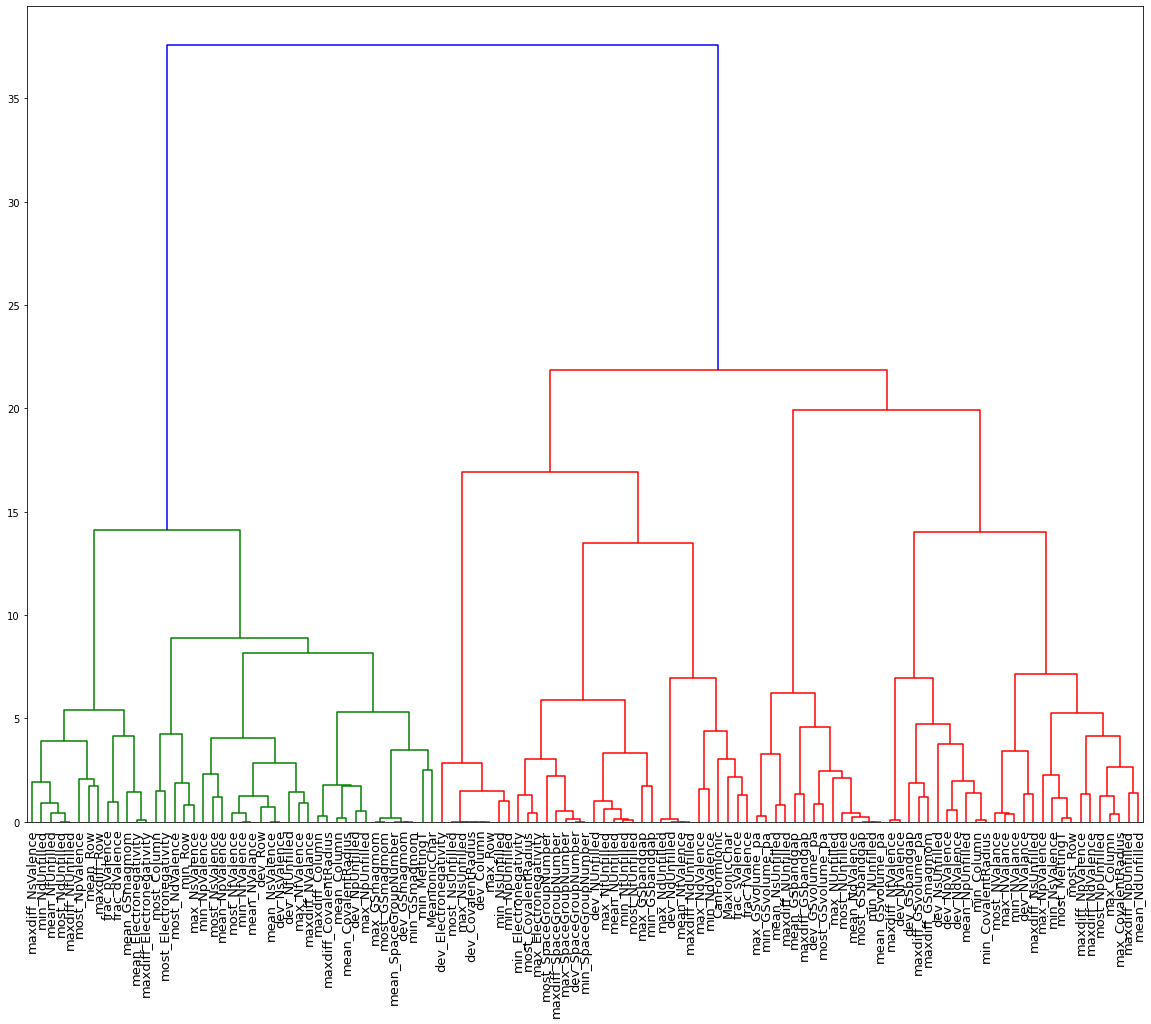

In [87]:
from scipy.cluster import hierarchy

corr_linkage = hierarchy.ward(corr)


import matplotlib.pyplot as plt
### Task 2.2: please use the hierarchical clustering (corr_linkage) and final_features you get in task1 to make a dendrogarm named dendro.
#
plt.figure(figsize=(20,15))
#plt.title('Dendrogram of Final Features')
dendro = hierarchy.dendrogram(corr_linkage, labels= final_features, leaf_font_size= 13) 



plt.show()

#

In [80]:
print(dendro['leaves'])
print(dendro['ivl'])

len(dendro['leaves'])

[27, 72, 74, 73, 75, 37, 8, 9, 111, 112, 98, 20, 21, 7, 25, 43, 12, 29, 36, 31, 32, 49, 48, 50, 10, 26, 28, 76, 47, 51, 3, 15, 2, 14, 64, 65, 101, 103, 104, 100, 102, 0, 116, 22, 61, 59, 16, 4, 11, 60, 66, 24, 19, 23, 109, 105, 107, 106, 108, 82, 77, 80, 78, 79, 95, 96, 71, 70, 44, 69, 41, 42, 114, 115, 110, 113, 89, 90, 56, 81, 92, 93, 88, 91, 83, 85, 38, 97, 84, 86, 45, 46, 94, 87, 99, 58, 34, 40, 62, 6, 18, 55, 53, 54, 52, 57, 35, 30, 1, 13, 33, 39, 67, 5, 17, 63, 68]
['maxdiff_NsValence', 'min_NdUnfilled', 'mean_NfUnfilled', 'most_NdUnfilled', 'maxdiff_NfUnfilled', 'most_NpValence', 'mean_Row', 'maxdiff_Row', 'frac_pValence', 'frac_dValence', 'mean_GSmagmom', 'mean_Electronegativity', 'maxdiff_Electronegativity', 'most_Column', 'most_Electronegativity', 'most_NdValence', 'min_Row', 'max_NsValence', 'min_NpValence', 'most_NsValence', 'mean_NpValence', 'most_NfValence', 'min_NfValence', 'mean_NValance', 'dev_Row', 'mean_NsValence', 'dev_NsValence', 'dev_NfUnfilled', 'max_NfValence', 

117

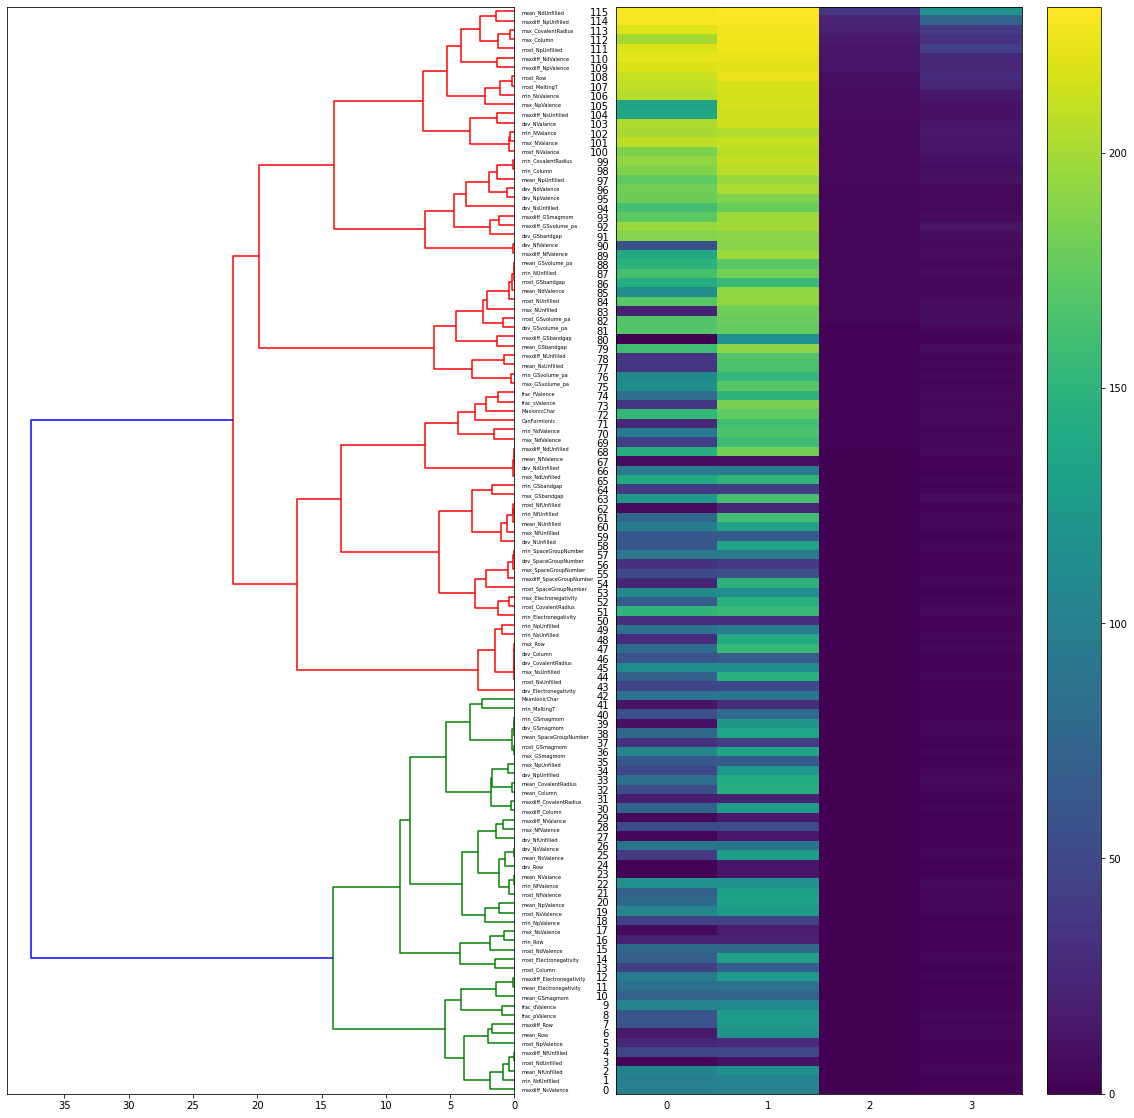

In [90]:

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
 
ydendro = hierarchy.dendrogram(corr_linkage,labels= final_features, orientation='left', 
                         distance_sort='descending')

#corr_linkage=corr_linkage[dendro['leaves'],:]
#corr_linkage=corr_linkage[:,dendro['leaves']]

plt.subplot(1, 2, 2)
plt.imshow(corr_linkage, aspect='auto', interpolation='none',
               )
plt.colorbar()
plt.xticks(range(corr_linkage.shape[1]))
plt.yticks(range(corr_linkage.shape[0]))
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().invert_yaxis()
plt.show()


In [28]:
cluster_ids = hierarchy.fcluster(corr_linkage, t=2, criterion='distance')
# t - the maximum inter-cluster distance

from collections import defaultdict
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
print(cluster_id_to_feature_ids)

print(cluster_id_to_feature_ids.values())

# cluster_id_to_feature_ids is a minimized from corr_linkage by merging the nearest data.

selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
print(selected_features)
print('number of features after correlation reduction:',len(selected_features))

# selected_features is indicated a rest of features which is omitted by merged the nearest data

defaultdict(<class 'list'>, {14: [0], 40: [1, 13, 30], 12: [2, 3, 14, 15, 64, 65], 16: [4, 11, 16, 59, 60, 61, 66], 43: [5, 17, 67], 36: [6, 18, 34, 40, 62], 6: [7, 25], 2: [8, 9], 10: [10, 26, 28, 48, 49, 50], 7: [12, 29, 43], 18: [19, 23, 24], 5: [20, 21, 98], 17: [22], 1: [27, 72, 73, 74, 75], 8: [31, 32], 42: [33, 39], 41: [35], 9: [36], 3: [37], 32: [38, 84, 85, 86, 97], 24: [41, 42], 23: [44, 69, 70, 71], 34: [45, 46], 11: [47, 51, 76], 39: [52, 57], 38: [53, 54, 55], 29: [56, 81], 37: [58], 44: [63, 68], 21: [77, 78, 79, 80, 82], 33: [83], 35: [87, 94, 99], 31: [88, 91], 28: [89, 90], 30: [92, 93], 22: [95, 96], 13: [100, 101, 102, 103, 104], 19: [105, 106, 107, 108], 20: [109], 25: [110, 113], 4: [111, 112], 27: [114], 26: [115], 15: [116]})
dict_values([[0], [1, 13, 30], [2, 3, 14, 15, 64, 65], [4, 11, 16, 59, 60, 61, 66], [5, 17, 67], [6, 18, 34, 40, 62], [7, 25], [8, 9], [10, 26, 28, 48, 49, 50], [12, 29, 43], [19, 23, 24], [20, 21, 98], [22], [27, 72, 73, 74, 75], [31, 32],

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=10, random_state=0)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

skb = SelectKBest(score_func=f_regression)
est_rf = RandomForestRegressor(random_state=0)
pipe_rf = Pipeline([('SKB', skb), ('forest', est_rf)])

param_grid_rf = {
     'forest__n_estimators':[1, 5, 100],
     'forest__max_depth':[1, 5, 10, 15],
     'forest__max_features':[None],
     'forest__min_samples_leaf':[1]
} 


In [31]:
from sklearn.model_selection import GridSearchCV

gcv_rf = GridSearchCV(estimator = est_rf , param_grid = param_grid_rf, cv = 3,return_train_score=True) #fill here
gcv_rf.fit(X_train, y_train)
print('\nRandomForest:', gcv_rf.best_score_)
print(gcv_rf.best_params_)

ValueError: ignored

In [ ]:
#here please fill the best parameter you found in last step
#est_rf = RandomForestRegressor(random_state=,max_features=' ',n_estimators= , max_depth= , min_samples_leaf= ) 


best_results=-10
best_state=-1

for i in range (1000):
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=20, random_state=i)
    X_train=X_train[:,selected_features]
    X_test=X_test[:,selected_features]
    est_rf.fit(X_train,y_train)
    result=est_rf.score(X_test, y_test)
    if result>best_results:
        best_results=result
        best_state=i

print(best_results,best_state)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=20, random_state=best_state)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]